In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.options.display.max_columns = None

In [2]:
energy_dataset = pd.read_csv("energy_dataset.csv")

In [3]:
energy_dataset

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,1164.0,973.0,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,1503.0,949.0,779.0,0.0,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,1826.0,953.0,720.0,0.0,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,NaN,1.0,1135.0,4836.0,0.0,6073.0,63.0,95.0,85.0,277.0,0.0,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,NaN,1.0,1172.0,3931.0,0.0,6074.0,62.0,95.0,33.0,280.0,0.0,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,NaN,50.0,1148.0,2831.0,0.0,6076.0,61.0,94.0,31.0,286.0,0.0,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,NaN,108.0,1128.0,2068.0,0.0,6075.0,61.0,93.0,31.0,287.0,0.0,3586.0,29.0,NaN,3273.0,25450.0,25801.0,63.93,69.89


In [4]:
weather_dataset = pd.read_csv("weather_features.csv")

In [5]:
weather_dataset

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178391,2018-12-31 19:00:00+01:00,Seville,287.760,287.150,288.150,1028,54,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178392,2018-12-31 20:00:00+01:00,Seville,285.760,285.150,286.150,1029,62,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178393,2018-12-31 21:00:00+01:00,Seville,285.150,285.150,285.150,1028,58,4,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178394,2018-12-31 22:00:00+01:00,Seville,284.150,284.150,284.150,1029,57,4,60,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [6]:
#AYKIRI DEĞERLERİ TESPİT EDİP YAKALAYALIM
Q1 = energy_dataset["price actual"].quantile(0.25)
Q3 = energy_dataset["price actual"].quantile(0.75)
IQR = Q3-Q1

In [7]:
Q1

49.347500000000004

In [8]:
Q3

68.01

In [9]:
IQR

18.6625

In [10]:
alt_sinir = Q1- 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

In [11]:
alt_sinir

21.35375

In [12]:
ust_sinir

96.00375000000001

In [13]:
(energy_dataset["price actual"] < alt_sinir) | (energy_dataset["price actual"] > ust_sinir)

0        False
1        False
2        False
3        False
4        False
         ...  
35059    False
35060    False
35061    False
35062    False
35063    False
Name: price actual, Length: 35064, dtype: bool

In [14]:
aykiri_tf = (energy_dataset["price actual"] < alt_sinir)

In [15]:
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: price actual, dtype: bool

In [16]:
energy_dataset["price actual"][aykiri_tf]

697      16.79
698      15.93
699      15.76
700      14.70
701      16.82
         ...  
29149    18.15
29150    14.61
29151    15.05
29152    18.64
29153    17.93
Name: price actual, Length: 575, dtype: float64

In [17]:
energy_dataset["price actual"][aykiri_tf].index

Int64Index([  697,   698,   699,   700,   701,   722,   723,   724,   725,
              726,
            ...
            28455, 28456, 28514, 28515, 28539, 29149, 29150, 29151, 29152,
            29153],
           dtype='int64', length=575)

In [18]:
#AYKIRI DEĞERİERİ ORTADAN KALDIRALIM

In [19]:
energy_dataset["price actual"] = pd.DataFrame(energy_dataset["price actual"])

In [20]:
energy_price_actual = energy_dataset[["price actual"]]

In [21]:
data = energy_dataset[~((energy_price_actual < (alt_sinir)) | (energy_price_actual > (ust_sinir))).any(axis = 1)]

In [22]:
data

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,1164.0,973.0,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,1503.0,949.0,779.0,0.0,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,1826.0,953.0,720.0,0.0,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,NaN,1.0,1135.0,4836.0,0.0,6073.0,63.0,95.0,85.0,277.0,0.0,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,NaN,1.0,1172.0,3931.0,0.0,6074.0,62.0,95.0,33.0,280.0,0.0,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,NaN,50.0,1148.0,2831.0,0.0,6076.0,61.0,94.0,31.0,286.0,0.0,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,NaN,108.0,1128.0,2068.0,0.0,6075.0,61.0,93.0,31.0,287.0,0.0,3586.0,29.0,NaN,3273.0,25450.0,25801.0,63.93,69.89


In [23]:
#VERİMİZİ HEDEF DEĞİŞKENİMİZDE YER ALAN AYKIRI DEĞERLERDEN KURTARDIK

In [24]:
#fazla boş dğerlere sahip sütunları ortadan kaldıralım
data.isnull().sum()

time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     34365
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

In [25]:
data = data.drop("generation hydro pumped storage aggregated", axis = 1)

In [26]:
data = data.drop("forecast wind offshore eday ahead", axis = 1)

In [27]:
#geri kalan eksik veri gözlenen sütunların boş yerlerine kendi ortalamaları ile dolduralım

In [28]:
data = data.where(pd.notna(data), data.mean(), axis = "columns")

In [29]:
data.isnull().sum()

time                                           0
generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil coal-derived gas             0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation fossil oil shale                    0
generation fossil peat                         0
generation geothermal                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation marine                              0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind offshore                       0
generation wind onsh

In [30]:
weather_dataset.isnull().sum()

dt_iso                 0
city_name              0
temp                   0
temp_min               0
temp_max               0
pressure               0
humidity               0
wind_speed             0
wind_deg               0
rain_1h                0
rain_3h                0
snow_3h                0
clouds_all             0
weather_id             0
weather_main           0
weather_description    0
weather_icon           0
dtype: int64

In [31]:
#verileri birleştirelim
dataset = pd.merge(data,weather_dataset,left_on="time",right_on="dt_iso")
#farklı veriseti değer sayısı 2 den az olan değerleri düşürüyoruz
drop_columns = dataset.nunique()[dataset.nunique() < 2].index.to_list()
dataset = dataset.drop(drop_columns,axis=1)

In [32]:
dataset

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41,2015-01-01 00:00:00+01:00,Valencia,270.475000,270.475000,270.475000,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41,2015-01-01 00:00:00+01:00,Madrid,267.325000,267.325000,267.325000,971,63,1,309,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41,2015-01-01 00:00:00+01:00,Bilbao,269.657312,269.657312,269.657312,1036,97,0,226,0.0,0.0,0.0,0,800,clear,sky is clear,01
3,2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41,2015-01-01 00:00:00+01:00,Barcelona,281.625000,281.625000,281.625000,1035,100,7,58,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41,2015-01-01 00:00:00+01:00,Seville,273.375000,273.375000,273.375000,1039,75,1,21,0.0,0.0,0.0,0,800,clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174832,2018-12-31 23:00:00+01:00,290.0,0.0,6926.0,2166.0,163.0,108.0,1069.0,1686.0,6075.0,61.0,92.0,31.0,287.0,3651.0,26.0,3117.0,24424.0,24455.0,64.27,69.88,2018-12-31 23:00:00+01:00,Valencia,279.140000,278.150000,280.150000,1029,75,2,300,0.0,0.0,0.0,0,800,clear,sky is clear,01n
174833,2018-12-31 23:00:00+01:00,290.0,0.0,6926.0,2166.0,163.0,108.0,1069.0,1686.0,6075.0,61.0,92.0,31.0,287.0,3651.0,26.0,3117.0,24424.0,24455.0,64.27,69.88,2018-12-31 23:00:00+01:00,Madrid,275.150000,275.150000,275.150000,1031,74,1,360,0.0,0.0,0.0,0,800,clear,sky is clear,01n
174834,2018-12-31 23:00:00+01:00,290.0,0.0,6926.0,2166.0,163.0,108.0,1069.0,1686.0,6075.0,61.0,92.0,31.0,287.0,3651.0,26.0,3117.0,24424.0,24455.0,64.27,69.88,2018-12-31 23:00:00+01:00,Bilbao,275.600000,275.150000,276.150000,1034,93,2,100,0.0,0.0,0.0,0,800,clear,sky is clear,01n
174835,2018-12-31 23:00:00+01:00,290.0,0.0,6926.0,2166.0,163.0,108.0,1069.0,1686.0,6075.0,61.0,92.0,31.0,287.0,3651.0,26.0,3117.0,24424.0,24455.0,64.27,69.88,2018-12-31 23:00:00+01:00,Barcelona,280.130000,277.150000,283.150000,1028,100,5,310,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [33]:
dataset = dataset.drop("dt_iso", axis = 1)
dataset = dataset.drop("city_name", axis = 1)
dataset.index = dataset["time"]
dataset = dataset.drop("time", axis = 1)
dataset = dataset.drop("weather_description", axis = 1)
dataset = dataset.drop("weather_icon", axis = 1)
dataset.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.1,65.41,270.475000,270.475000,270.475000,1001,77,1,62,0.0,0.0,0.0,0,800,clear
2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.1,65.41,267.325000,267.325000,267.325000,971,63,1,309,0.0,0.0,0.0,0,800,clear
2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.1,65.41,269.657312,269.657312,269.657312,1036,97,0,226,0.0,0.0,0.0,0,800,clear
2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.1,65.41,281.625000,281.625000,281.625000,1035,100,7,58,0.0,0.0,0.0,0,800,clear
2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.1,65.41,273.375000,273.375000,273.375000,1039,75,1,21,0.0,0.0,0.0,0,800,clear


In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174837 entries, 2015-01-01 00:00:00+01:00 to 2018-12-31 23:00:00+01:00
Data columns (total 33 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   generation biomass                           174837 non-null  float64
 1   generation fossil brown coal/lignite         174837 non-null  float64
 2   generation fossil gas                        174837 non-null  float64
 3   generation fossil hard coal                  174837 non-null  float64
 4   generation fossil oil                        174837 non-null  float64
 5   generation hydro pumped storage consumption  174837 non-null  float64
 6   generation hydro run-of-river and poundage   174837 non-null  float64
 7   generation hydro water reservoir             174837 non-null  float64
 8   generation nuclear                           174837 non-null  float64
 9   generation other     

In [35]:
#32  weather_main                                 174837 non-null  object 
#33  weather_description                          174837 non-null  object 
#34  weather_icon                                 174837 non-null  object 
#nümerik hale getirelim

In [36]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()

In [37]:
dataset["weather_main"] = lbe.fit_transform(dataset["weather_main"])

In [38]:
dataset

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41,270.475000,270.475000,270.475000,1001,77,1,62,0.0,0.0,0.0,0,800,0
2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41,267.325000,267.325000,267.325000,971,63,1,309,0.0,0.0,0.0,0,800,0
2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41,269.657312,269.657312,269.657312,1036,97,0,226,0.0,0.0,0.0,0,800,0
2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41,281.625000,281.625000,281.625000,1035,100,7,58,0.0,0.0,0.0,0,800,0
2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41,273.375000,273.375000,273.375000,1039,75,1,21,0.0,0.0,0.0,0,800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:00:00+01:00,290.0,0.0,6926.0,2166.0,163.0,108.0,1069.0,1686.0,6075.0,61.0,92.0,31.0,287.0,3651.0,26.0,3117.0,24424.0,24455.0,64.27,69.88,279.140000,278.150000,280.150000,1029,75,2,300,0.0,0.0,0.0,0,800,0
2018-12-31 23:00:00+01:00,290.0,0.0,6926.0,2166.0,163.0,108.0,1069.0,1686.0,6075.0,61.0,92.0,31.0,287.0,3651.0,26.0,3117.0,24424.0,24455.0,64.27,69.88,275.150000,275.150000,275.150000,1031,74,1,360,0.0,0.0,0.0,0,800,0
2018-12-31 23:00:00+01:00,290.0,0.0,6926.0,2166.0,163.0,108.0,1069.0,1686.0,6075.0,61.0,92.0,31.0,287.0,3651.0,26.0,3117.0,24424.0,24455.0,64.27,69.88,275.600000,275.150000,276.150000,1034,93,2,100,0.0,0.0,0.0,0,800,0


In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174837 entries, 2015-01-01 00:00:00+01:00 to 2018-12-31 23:00:00+01:00
Data columns (total 33 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   generation biomass                           174837 non-null  float64
 1   generation fossil brown coal/lignite         174837 non-null  float64
 2   generation fossil gas                        174837 non-null  float64
 3   generation fossil hard coal                  174837 non-null  float64
 4   generation fossil oil                        174837 non-null  float64
 5   generation hydro pumped storage consumption  174837 non-null  float64
 6   generation hydro run-of-river and poundage   174837 non-null  float64
 7   generation hydro water reservoir             174837 non-null  float64
 8   generation nuclear                           174837 non-null  float64
 9   generation other     

In [42]:
dataset.corr()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main
generation biomass,1.000000,0.225512,-0.028196,0.431718,0.453589,-0.030414,-0.281111,-0.028843,-0.022024,0.659705,-0.577385,-0.004175,-0.357756,-0.065834,-0.008002,-0.068510,0.076817,0.074592,0.094062,0.125757,0.031473,0.021670,0.034353,0.006528,-0.024083,-0.013776,0.020276,0.025737,0.038130,0.013908,-0.014836,0.013981,-0.016062
generation fossil brown coal/lignite,0.225512,1.000000,0.490527,0.763345,0.301276,-0.306285,-0.517497,-0.226163,-0.019903,0.095732,0.086582,0.039633,0.269299,-0.425971,0.041979,-0.427584,0.267139,0.269254,0.560527,0.348758,0.056866,0.054352,0.056424,-0.009418,0.007830,-0.085769,-0.065873,-0.044396,-0.003262,-0.007105,-0.020157,0.028666,-0.031651
generation fossil gas,-0.028196,0.490527,1.000000,0.531601,0.301581,-0.410021,-0.260390,0.064704,-0.129651,-0.068909,0.318267,0.075785,0.261868,-0.389129,0.081829,-0.388660,0.535650,0.541151,0.629796,0.444599,0.101937,0.107532,0.088227,-0.007226,-0.070152,-0.045706,-0.066571,-0.035295,-0.017118,-0.010243,-0.021780,0.024974,-0.031190
generation fossil hard coal,0.431718,0.763345,0.531601,1.000000,0.428637,-0.386111,-0.488663,-0.152697,-0.039256,0.265704,-0.047202,0.045553,0.149811,-0.431458,0.047275,-0.433415,0.382251,0.384541,0.659797,0.445452,0.073863,0.068405,0.072676,-0.009403,-0.025755,-0.073696,-0.056201,-0.026143,0.009248,-0.002628,-0.025686,0.029208,-0.033591
generation fossil oil,0.453589,0.301276,0.301581,0.428637,1.000000,-0.310280,-0.092752,0.173577,0.012106,0.376403,-0.138262,0.100093,-0.197932,-0.034451,0.096560,-0.039837,0.493742,0.491457,0.265142,0.256085,0.090908,0.087403,0.084755,-0.002828,-0.095546,0.010128,-0.011563,0.006152,0.018381,0.001028,-0.021522,0.015931,-0.022491
generation hydro pumped storage consumption,-0.030414,-0.306285,-0.410021,-0.386111,-0.310280,1.000000,0.029626,-0.253790,0.026913,0.028214,-0.249181,-0.215039,-0.168544,0.371006,-0.223444,0.370923,-0.555305,-0.558706,-0.581882,-0.399855,-0.199515,-0.199642,-0.186665,0.008104,0.140193,0.005201,0.057842,0.006547,-0.000342,-0.005903,0.025604,-0.016890,0.026197
generation hydro run-of-river and poundage,-0.281111,-0.517497,-0.260390,-0.488663,-0.092752,0.029626,1.000000,0.654928,-0.119220,-0.122183,0.072147,0.038464,-0.275799,0.213341,0.043665,0.215930,0.136939,0.135118,-0.274926,-0.111257,-0.093950,-0.083219,-0.098834,0.006397,-0.013570,0.099277,0.048618,0.039351,0.004571,0.015501,0.057917,-0.048277,0.057081
generation hydro water reservoir,-0.028843,-0.226163,0.064704,-0.152697,0.173577,-0.253790,0.654928,1.000000,-0.046212,0.069285,-0.060240,0.091035,-0.282498,-0.029095,0.102119,-0.021478,0.483708,0.486671,-0.007635,0.086096,-0.010671,-0.016021,-0.002533,0.010007,-0.059920,0.070946,0.010164,0.036698,0.011388,0.010272,0.045838,-0.031679,0.036420
generation nuclear,-0.022024,-0.019903,-0.129651,-0.039256,0.012106,0.026913,-0.119220,-0.046212,1.000000,0.041536,-0.076155,0.005697,0.075019,0.061207,0.001205,0.057878,0.083301,0.078729,-0.071671,-0.079241,-0.024965,-0.033231,-0.014822,0.008953,0.011301,0.019705,0.007429,0.021281,-0.003283,-0.005830,0.021307,-0.004638,0.013332
generation other,0.659705,0.095732,-0.068909,0.265704,0.376403,0.028214,-0.122183,0.069285,0.041536,1.000000,-0.453376,-0.012600,-0.368569,0.045628,-0.015194,0.044073,0.096422,0.095629,0.035826,0.092002,-0.030557,-0.037560,-0.023421,0.010028,0.008855,-0.005178,0.022781,0.026664,0.029510,0.007479,0.005561,-0.0

In [40]:
X_test,y_test = dataset.iloc[-24:,:].drop("price actual",axis=1),dataset.iloc[-24:,:]["price actual"]
X_train,y_train = dataset.iloc[:-24,:].drop("price actual",axis=1),dataset.iloc[:-24,:]["price actual"]

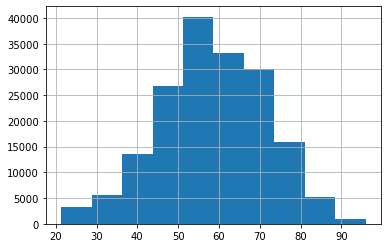

In [43]:
dataset["price actual"].hist();

In [44]:
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 

In [45]:
from lightgbm import LGBMRegressor

In [46]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

In [47]:
y_pred = lgbm_model.predict(X_test, 
                            num_iteration = lgbm_model.best_iteration_)

In [48]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.6051837980827295

In [49]:
lgbm_model

LGBMRegressor()

In [50]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv = 4, n_jobs = -1, verbose = 2)

In [51]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 4 folds for each of 960 candidates, totalling 3840 fits


GridSearchCV(cv=4, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [20, 40, 100, 200, 500, 1000]},
             verbose=2)

In [52]:
lgbm_cv_model.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 500}

In [56]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.01, 
                           max_depth = 3, 
                           n_estimators = 500,
                          colsample_bytree = 1)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

In [57]:
y_pred = lgbm_tuned.predict(X_test)

In [58]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.359214963101218

In [63]:
Importance = pd.DataFrame({"Importance": lgbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

<Figure size 720x7200 with 0 Axes>

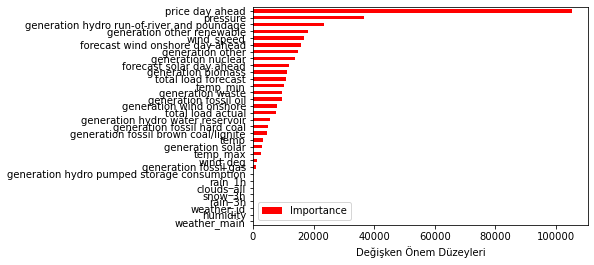

In [64]:
plt.figure(figsize=(10,100))
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

In [77]:
Importance

,Importance
generation biomass,11300
generation fossil brown coal/lignite,4800
generation fossil gas,900
generation fossil hard coal,5100
generation fossil oil,9600
generation hydro pumped storage consumption,0
generation hydro run-of-river and poundage,23500
generation hydro water reservoir,5500
generation nuclear,14000
generation other,15000


In [79]:
dataset = dataset.drop(["generation hydro pumped storage consumption", "humidity", "rain_1h", "rain_3h", "snow_3h", "clouds_all", "weather_id", "weather_main"], axis = 1)

In [80]:
dataset

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,temp,temp_min,temp_max,pressure,wind_speed,wind_deg
time,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41,270.475000,270.475000,270.475000,1001,1,62
2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41,267.325000,267.325000,267.325000,971,1,309
2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41,269.657312,269.657312,269.657312,1036,0,226
2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41,281.625000,281.625000,281.625000,1035,7,58
2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41,273.375000,273.375000,273.375000,1039,1,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:00:00+01:00,290.0,0.0,6926.0,2166.0,163.0,1069.0,1686.0,6075.0,61.0,92.0,31.0,287.0,3651.0,26.0,3117.0,24424.0,24455.0,64.27,69.88,279.140000,278.150000,280.150000,1029,2,300
2018-12-31 23:00:00+01:00,290.0,0.0,6926.0,2166.0,163.0,1069.0,1686.0,6075.0,61.0,92.0,31.0,287.0,3651.0,26.0,3117.0,24424.0,24455.0,64.27,69.88,275.150000,275.150000,275.150000,1031,1,360
2018-12-31 23:00:00+01:00,290.0,0.0,6926.0,2166.0,163.0,1069.0,1686.0,6075.0,61.0,92.0,31.0,287.0,3651.0,26.0,3117.0,24424.0,24455.0,64.27,69.88,275.600000,275.150000,276.150000,1034,2,100


In [81]:
X_test,y_test = dataset.iloc[-24:,:].drop("price actual",axis=1),dataset.iloc[-24:,:]["price actual"]
X_train,y_train = dataset.iloc[:-24,:].drop("price actual",axis=1),dataset.iloc[:-24,:]["price actual"]

In [82]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

In [83]:
y_pred = lgbm_model.predict(X_test, 
                            num_iteration = lgbm_model.best_iteration_)

In [84]:
np.sqrt(mean_squared_error(y_test, y_pred))

1.9476376960732278

In [85]:
lgbm_model

LGBMRegressor()

In [86]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv = 4, n_jobs = -1, verbose = 2)

In [87]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 4 folds for each of 960 candidates, totalling 3840 fits


GridSearchCV(cv=4, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [20, 40, 100, 200, 500, 1000]},
             verbose=2)

In [88]:
lgbm_cv_model.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 40}

In [89]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, 
                           max_depth = 3, 
                           n_estimators = 40,
                          colsample_bytree = 0.9)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

In [90]:
y_pred = lgbm_tuned.predict(X_test)

In [91]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.5241512616784743

In [92]:
Importance = pd.DataFrame({"Importance": lgbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

<Figure size 720x7200 with 0 Axes>

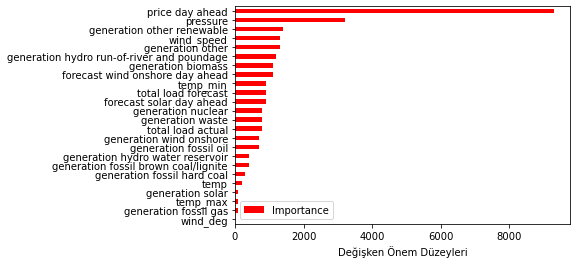

In [93]:
plt.figure(figsize=(10,100))
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")